# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df[client_df['cons_last_month'] != 0]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0
10,d5e512dbc8118a830a7b8c7f61d89992,usilxuppasemubllopkaafesmlibmsdf,10831,0,3112,2011-07-11,2016-07-11,2011-07-11,2015-07-12,1204.58,...,f,349.48,14.52,14.52,1,108.50,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,11.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14597,ae818f3cc00ef5845416699aacc4bd7e,ewpakwlliwisiwduibdlfmalxowmwpci,8310,0,685,2012-12-18,2016-12-18,2012-12-18,2015-12-21,833.05,...,f,67.03,24.02,24.02,1,102.52,3,kamkkxfxxuwbdslkwifmmcsiusiuosws,23.100,0
14598,1582ef35fbfa265e60bb3399bdebac87,MISSING,9441,0,480,2009-10-08,2016-10-08,2015-05-24,2015-10-09,983.97,...,f,46.98,20.00,20.00,1,113.17,6,ldkssxwpmemidmecebumciepifcamkci,15.001,0
14600,c49217f16a06263e5381eaba94a67a8b,foosdfpfkusacimwkcsosbicdxkicaua,87146,0,11367,2013-02-08,2016-02-08,2013-02-08,2015-02-09,712.33,...,f,71.81,66.00,66.00,1,87.14,3,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1


In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [41]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=15):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )


def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)

    # annotate_stacked_bars(ax)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

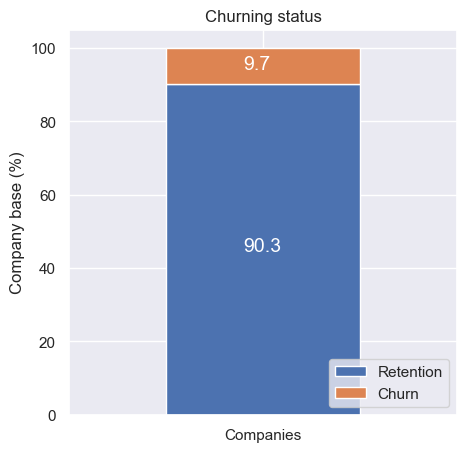

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

In [54]:
channel_0 = client_df[['id', 'channel_sales', 'churn']]
channel = channel_0.groupby([channel_0['channel_sales'], channel_0['churn']])['id'].count().unstack(level=1).fillna(0)


In [59]:
channel_0.groupby([channel_0['channel_sales'], channel_0['churn']])['id'].count().unstack(level=1)

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,NaN
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,NaN
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,NaN
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [60]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
channel_churn


churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


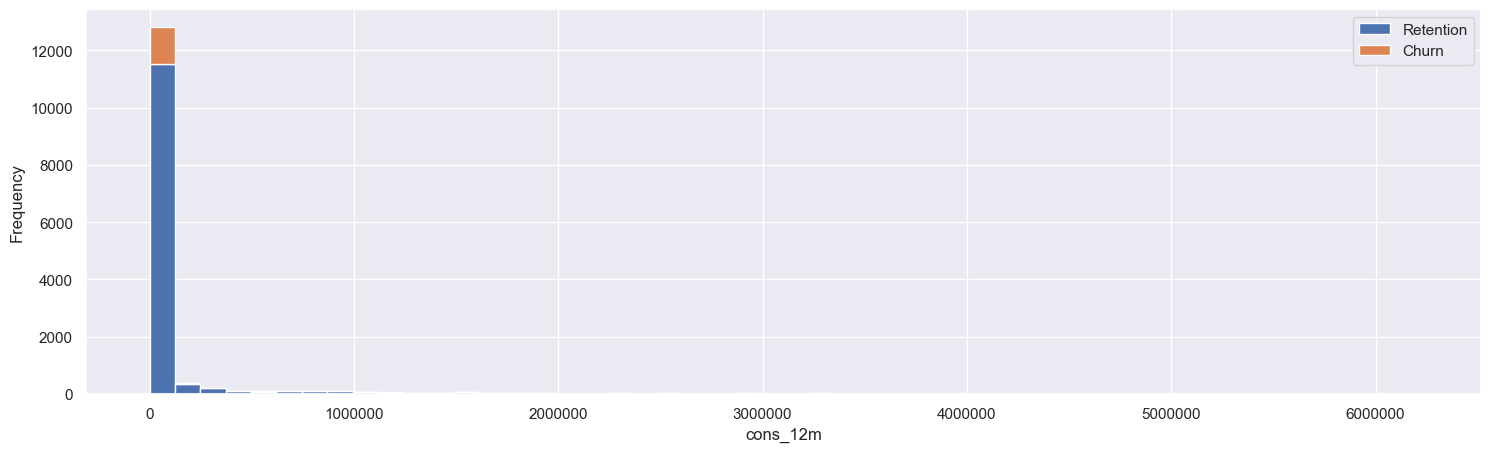

In [42]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [68]:
consumption[consumption['cons_12m']<1000]

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
30,44e826a55734d0ca5eeafcae0e991a75,324,0,0,0.00,f,1
63,4d4a8d5a884e49e2a8f7994b21a3cb18,10,0,0,0.00,f,0
69,d8711ce9aef0a42cf24b1e65da32fe3f,597,0,0,0.00,f,0
...,...,...,...,...,...,...,...
14443,5cc16189039724a2c2395bb63cce3b65,514,0,220,24.83,f,0
14444,4d96671b791363c991140f886fe8a901,563,0,0,0.00,f,0
14474,126ad2adc341c383539bbf24bfee5e02,394,0,0,0.00,f,0
14551,6ab5e1060acfe390c6fcaaad1263d329,0,0,0,0.00,f,0


In [43]:
price_df[price_df['id'] == '038af19179925da21a25619c5a24b745']

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


In [44]:
client_df[client_df['id'] == "038af19179925da21a25619c5a24b745"]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
11047,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


## Energy price distribution and churn

In [45]:
price_mean_df = price_df.groupby('id')['price_off_peak_var'].mean()
price_mean_df = price_mean_df.to_frame()

In [46]:
joined_price_churn_df = price_mean_df.merge(client_df[['id', 'churn']], how='inner', on='id') 

In [47]:
joined_price_churn_df

,id,price_off_peak_var,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0
3,00114d74e963e47177db89bc70108537,0.147926,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0
...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,0.122426,0
14602,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0
14603,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0


In [48]:
joined_price_churn_df.sort_values(by='churn')

,id,price_off_peak_var,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0
9510,a7826cf0e7fbfde09a6781401ce33767,0.148579,0
9511,a7853e3fb193069d388aab7493f0f545,0.150758,0
9512,a7893db459c76ed3bd649e5a9b3f16c6,0.148555,0
9513,a78c107fb0b031c2edd60fe6c98f2428,0.147625,0
...,...,...,...
1302,166c8dc6ad535d21467212f4e439921b,0.122696,1
11328,c708debd9eabf1f53f459e3542fb9e51,0.106887,1
2984,3334d1b71c03ca9f94e9f59bb1fdd74e,0.124041,1
9639,a989ea2f3b2a6c53557d6414eb75c37c,0.125087,1


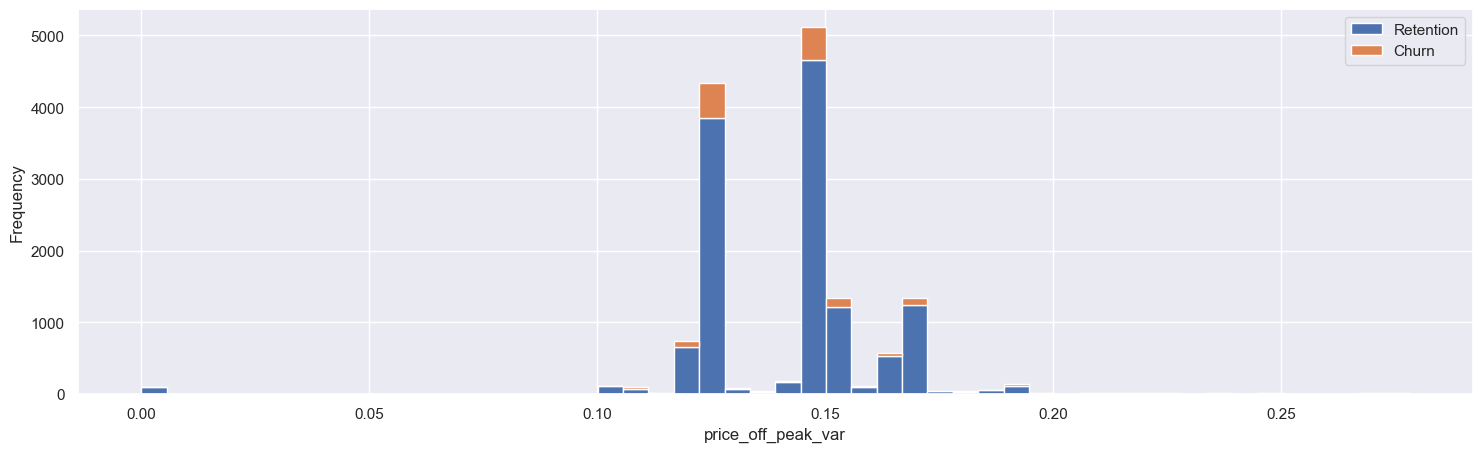

In [49]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(joined_price_churn_df, 'price_off_peak_var', axs)

## Whether being client of both power and gas has an impact

In [20]:
churn_gas_df = client_df[['id', 'has_gas', 'churn']].copy()
def convert_bin_to_num(binary):
    if binary == 't':
        return 1
    else:
        return 0
churn_gas_df['gas_bin'] = churn_gas_df['has_gas'].apply(convert_bin_to_num)
churn_gas_df

,id,has_gas,churn,gas_bin
0,24011ae4ebbe3035111d65fa7c15bc57,t,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,f,0,0
2,764c75f661154dac3a6c254cd082ea7d,f,0,0
3,bba03439a292a1e166f80264c16191cb,f,0,0
4,149d57cf92fc41cf94415803a877cb4b,f,0,0
...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,t,0,1
14602,d0a6f71671571ed83b2645d23af6de00,f,1,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,f,1,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,f,0,0


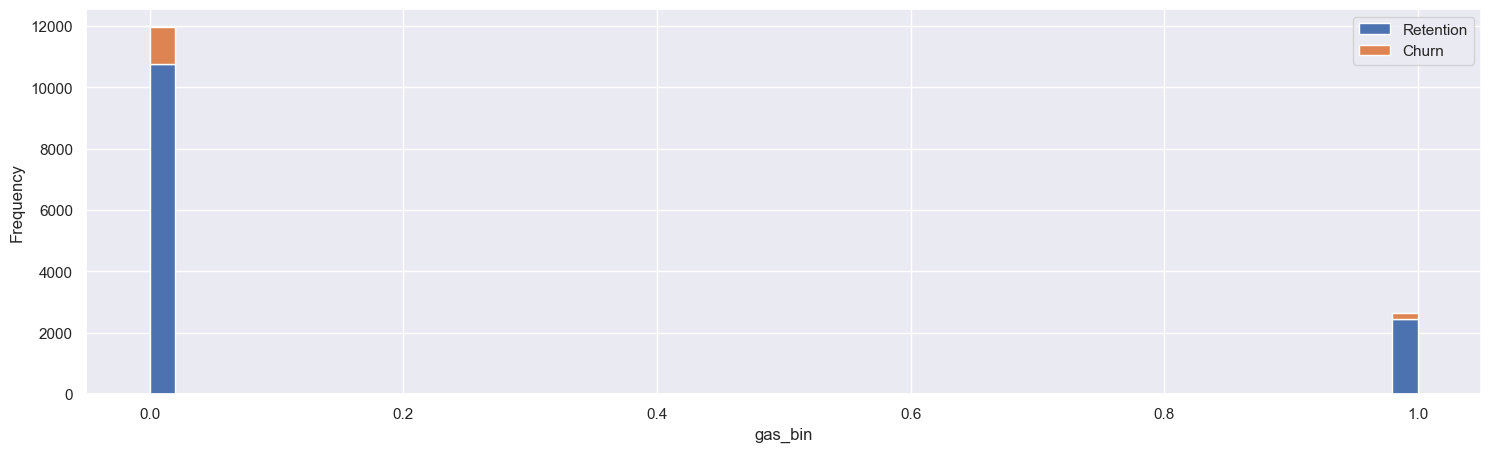

In [21]:

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(churn_gas_df, 'gas_bin', axs)

## Power price distribution and churn

In [22]:
power_price_mean_df = price_df.groupby('id')['price_off_peak_fix'].mean()
power_price_mean_df

id
0002203ffbb812588b632b9e628cc38d    40.701732
0004351ebdd665e6ee664792efc4fd13    44.385450
0010bcc39e42b3c2131ed2ce55246e3c    45.319710
0010ee3855fdea87602a5b7aba8e42de    40.647427
00114d74e963e47177db89bc70108537    44.266930
                                      ...    
ffef185810e44254c3a4c6395e6b4d8a    40.896427
fffac626da707b1b5ab11e8431a4d0a2    44.311375
fffc0cacd305dd51f316424bbb08d1bd    41.160171
fffe4f5646aa39c7f97f95ae2679ce64    40.606699
ffff7fa066f1fb305ae285bb03bf325a    40.647427
Name: price_off_peak_fix, Length: 16096, dtype: float64

In [23]:
power_price_mean_df = power_price_mean_df.to_frame()

In [24]:
joined_power_price_churn_df = power_price_mean_df.merge(client_df[['id', 'churn']], how="inner", on="id")

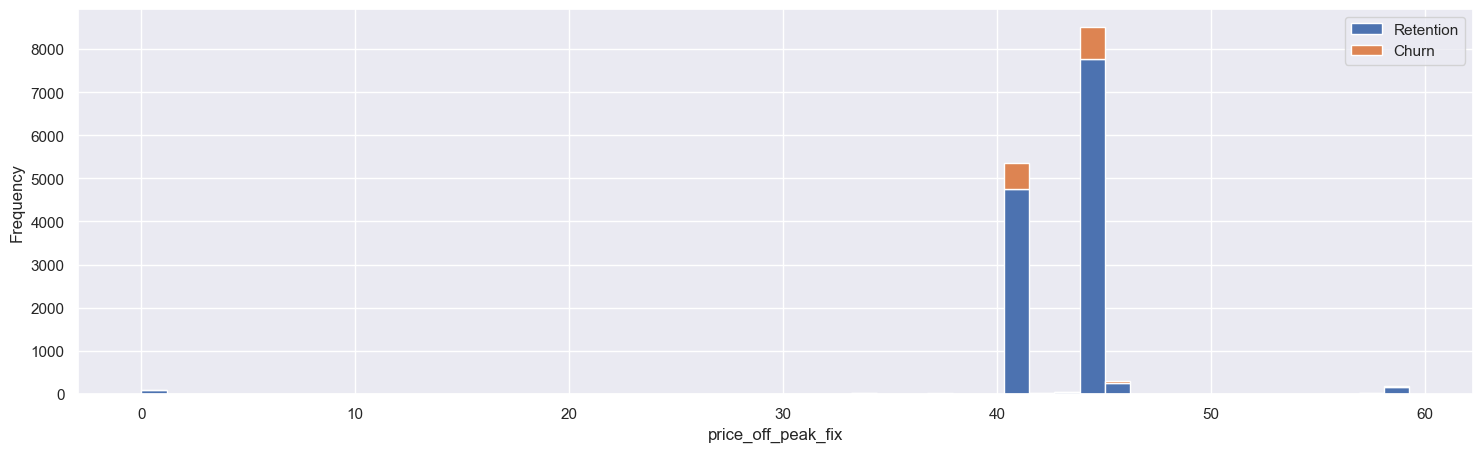

In [25]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(joined_power_price_churn_df, 'price_off_peak_fix', axs)

## Whether gross margin is a factor

In [26]:
gross_margin_per_year_df = client_df[['id', 'margin_gross_pow_ele', 'churn', 'num_years_antig']].copy()
gross_margin_per_year_df['yearly_margin'] = gross_margin_per_year_df['margin_gross_pow_ele']/gross_margin_per_year_df['num_years_antig']
gross_margin_per_year_df

,id,margin_gross_pow_ele,churn,num_years_antig,yearly_margin
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,1,3,8.480000
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,0,6,2.730000
2,764c75f661154dac3a6c254cd082ea7d,28.60,0,6,4.766667
3,bba03439a292a1e166f80264c16191cb,30.22,0,6,5.036667
4,149d57cf92fc41cf94415803a877cb4b,44.91,0,6,7.485000
...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,27.88,0,4,6.970000
14602,d0a6f71671571ed83b2645d23af6de00,0.00,1,3,0.000000
14603,10e6828ddd62cbcf687cb74928c4c2d2,39.84,1,4,9.960000
14604,1cf20fd6206d7678d5bcafd28c53b4db,13.08,0,3,4.360000


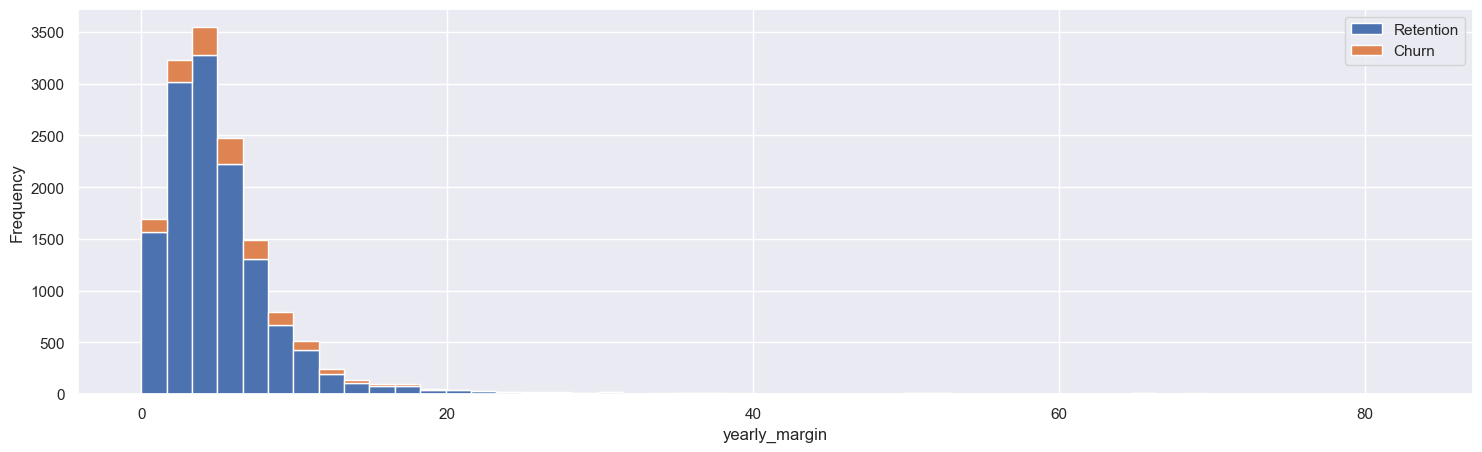

In [34]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(gross_margin_per_year_df, 'yearly_margin', axs)

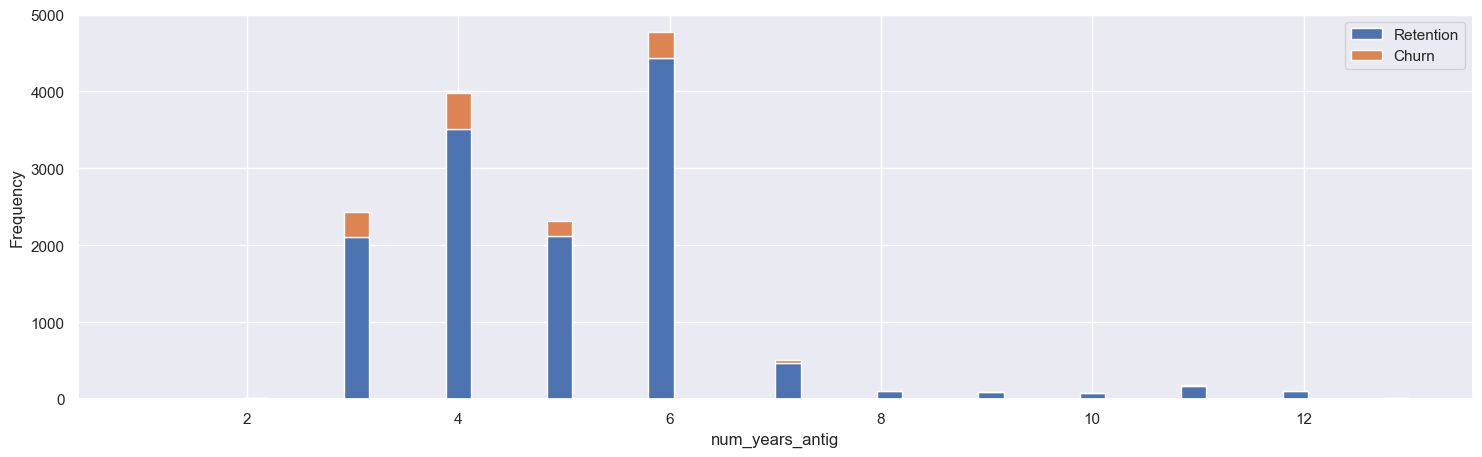

In [28]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(gross_margin_per_year_df, 'num_years_antig', axs)